# Project: Credit Classification

This project is divided into Four Parts. The first three belong to the midcourse project, and the last will be completed in the final project.

1. Data Prep & EDA
2. Logistic Regression
3. Imbalanced Data
4. Ensemble Models



## Step 1: Data Prep & EDA

1. Import the data - perform any datatype conversion as necessary
2. Modify the target variable - Group 'Standard' and 'Good' Credit together to create a binary classification problem
3. Explore the Data - which features appear to impact credit score group the most? Are any features highly correlated with each other? Remove any unnecessary features.
4. Prepare your data for modelling. Create dummy variables, split your data into train and test, and scale your features if necessary.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit = pd.read_csv("/Users/huzaifamalik/Downloads/Python for Data Science/Classification/Classification_Course_Materials/Data/credit_train_clean.csv")

In [3]:
credit.shape

(100000, 28)

In [4]:
credit.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [5]:
#See if there are any empty or missing values

credit.loc[credit.isna().any(axis = 1)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [6]:
#See if there are any duplicates

credit.loc[credit.duplicated()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [7]:
#See for any typos or inconsistencies in categorical columns

for col in credit.select_dtypes("object").drop(columns = ["Name"]).columns:
    print(credit[col].value_counts(dropna=False).sort_index(ascending=True))
    print("\n")

Occupation
Accountant       6744
Architect        6824
Developer        6720
Doctor           6568
Engineer         6864
Entrepreneur     6648
Journalist       6536
Lawyer           7096
Manager          6432
Mechanic         6776
Media_Manager    6720
Musician         6352
Scientist        6744
Teacher          6672
Writer           6304
Name: count, dtype: int64


Type_of_Loan
No Data                                                                                                                     11408
auto loan                                                                                                                    1152
auto loan,auto loan                                                                                                           152
auto loan,auto loan,auto loan                                                                                                  24
auto loan,auto loan,auto loan,auto loan,credit-builder loan,credit-builder loan,mortgage loan,pers

In [8]:
#Grouping by to see the distribution of customers who fall under each of the 3 credit categories
credit.groupby("Credit_Score").agg({"Credit_Score": "count"}).rename(columns = {"Credit_Score": "Customer_Count"})

,Customer_Count
Credit_Score,
Good,17828
Poor,28998
Standard,53174


In [9]:
#Grouping Good and Standard Credit Scores together for binary classification

credit["target"] = np.where(
    credit["Credit_Score"].str.contains("Poor", case=False, regex=True),0,1
)

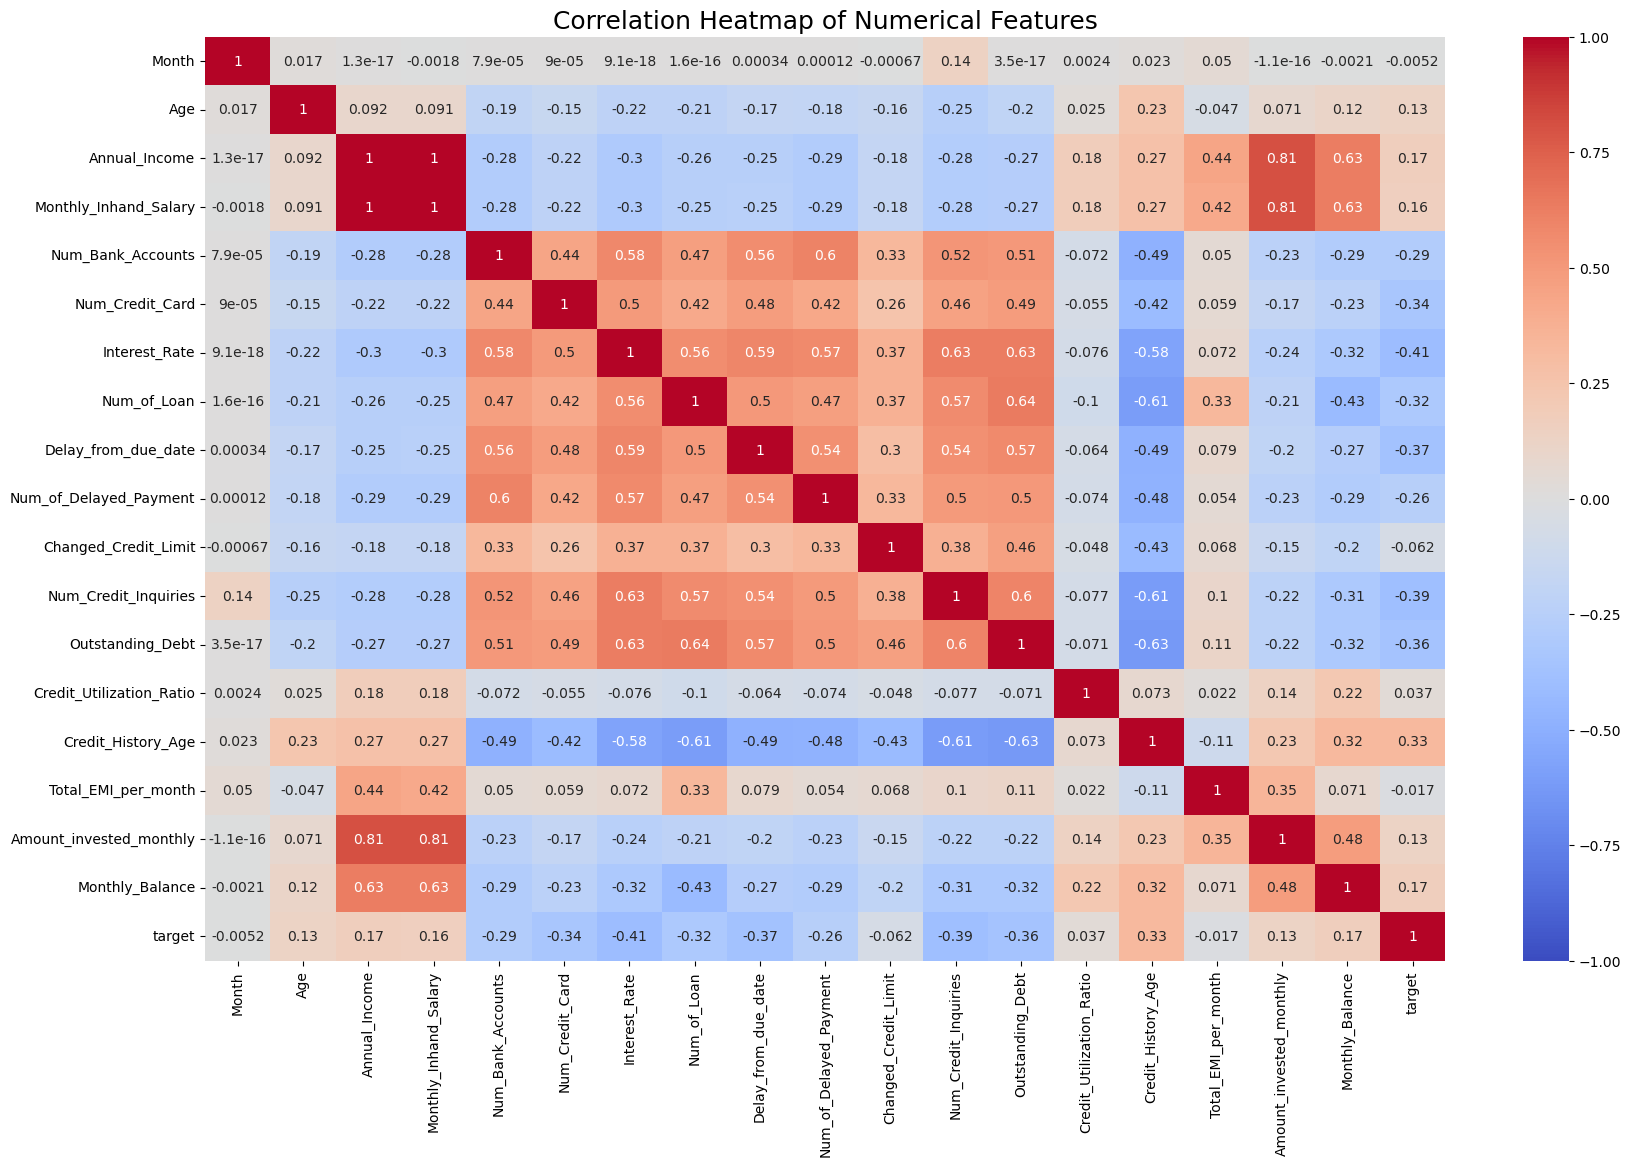

In [10]:
#Plotting the heatmap to visually see the correlation between different numerical variables/categories
plt.figure(figsize=(20,12))

sns.heatmap(
    credit.select_dtypes("number").drop(columns = ["ID", "Customer_ID", "SSN"]).corr(), 
    vmin =-1, vmax = 1, cmap = "coolwarm", annot = True
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=18)
plt.show();

In [21]:
#From the heatmap above, there is perfect collinear relationship between Annual Income and Monthly Inhand Salary
#This introduces multicollinearity
#Correlation between Monthly Inhand Salary and Target is 0.16 compared to 0.17 between Annual Income and Target
#So we can remove Monthly Inhand Salary from features list

features = [
    'Month',  
    'Age', 
    'Occupation',
    'Annual_Income', 
    #'Monthly_Inhand_Salary', 
    'Num_Bank_Accounts',
    'Num_Credit_Card', 
    'Interest_Rate', 
    'Num_of_Loan', 
#     'Type_of_Loan',
    'Delay_from_due_date', 
    'Num_of_Delayed_Payment', 
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 
    'Credit_Mix', 
    'Outstanding_Debt',
    'Credit_Utilization_Ratio', 
    'Credit_History_Age',
    'Payment_of_Min_Amount', 
    'Total_EMI_per_month',
    'Amount_invested_monthly', 
    'Payment_Behaviour', 
    'Monthly_Balance'
]

In [22]:
X = pd.get_dummies(credit.loc[:, features], drop_first=True, dtype=int)
y = credit["target"]

In [23]:
#Perform Data Splitting (80% Training, 20% Testing)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2023)

In [24]:
#Perform Standardization of Training and Testing Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## Step 2: Logistic Regression Model with Metrics

In [27]:
#Perform Logistic Regression with Cross Validation to find the best parameters for regularization

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

parameters = {
    "C": np.linspace(0.1, 2, 20),
    "penalty": ["l1", "l2"]
}

gridsearch = GridSearchCV(LogisticRegression(solver="saga", max_iter=5000), parameters)
gridsearch.fit(X_train_std, y_train)

gridsearch.best_params_

{'C': np.float64(0.7), 'penalty': 'l2'}

In [47]:
#Find Training and Testing Accuracy Score for tuned logistic regression model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logreg = LogisticRegression(C = 0.7, penalty="l2", solver="saga", max_iter=5000)

lr = logreg.fit(X_train_std, y_train)

print("Train Accuracy of tuned logistic regression model:", accuracy_score(y_train, lr.predict_proba(X_train_std)[:,1]>0.5))
print("Test Accuracy of tuned logistic regression model:", accuracy_score(y_test, lr.predict_proba(X_test_std)[:,1]>0.5))

Train Accuracy of tuned logistic regression model: 0.7895625
Test Accuracy of tuned logistic regression model: 0.78805


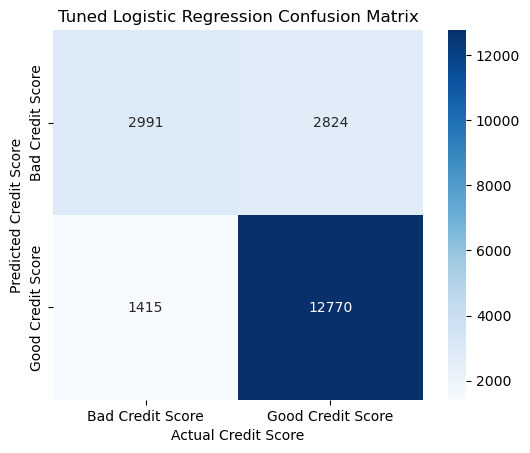

In [236]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for Logistic Regression Test Data
logreg_confusion = confusion_matrix(y_test, lr.predict_proba(X_test_std)[:,1]>0.5)

# Plot heatmap
sns.heatmap(
    logreg_confusion,
    cmap="Blues",
    annot=True,
    fmt="g",
    square=True,
    xticklabels=["Bad Credit Score", "Good Credit Score"],
    yticklabels=["Bad Credit Score", "Good Credit Score"]
).set(
    xlabel='Actual Credit Score',
    ylabel='Predicted Credit Score',
    title='Tuned Logistic Regression Confusion Matrix'
);


In [48]:
#Find Precision, Recall and F1 Score on Test Data for tuned logistic regression model

print("Test Precision of tuned logistic regression model:", precision_score(y_test, lr.predict_proba(X_test_std)[:,1]>0.5))
print("Test Recall of tuned logistic regression model:", recall_score(y_test, lr.predict_proba(X_test_std)[:,1]>0.5))
print("Test F1 Score of tuned logistic regression model:", f1_score(y_test, lr.predict_proba(X_test_std)[:,1]>0.5))

Test Precision of tuned logistic regression model: 0.8189047069385661
Test Recall of tuned logistic regression model: 0.9002467395135707
Test F1 Score of tuned logistic regression model: 0.8576513650559119


## Step 3: Imbalanced Technique (SMOTE Model) with Metrics

In [45]:
import imblearn.over_sampling

# Count positives and negatives
n_pos = y_train.loc[y_train == 1].count() ## There are 56817 observations for positive class
n_neg = y_train.loc[y_train == 0].count() ## There are 23183 observations for negative class

# Create 2x as many positive samples
ratio = {1: n_pos, 0: n_neg * 2}

# SMOTE oversampling for positives
smt = imblearn.over_sampling.SMOTE(
    sampling_strategy=ratio,
    random_state=2023
)

# Resample
X_train_rs, y_train_rs = smt.fit_resample(X_train, y_train)

#Now Standardize the resampled training data

X_train_rs_std = scaler.fit_transform(X_train_rs)

#Now use the same hyperparameters for smote model as for tuned logistic regression model
logreg = LogisticRegression(C = 0.7, penalty="l2", solver="saga", max_iter=5000)

lr_smote = logreg.fit(X_train_rs_std, y_train_rs)

print("Train Accuracy using Smote:", accuracy_score(y_train_rs, lr_smote.predict_proba(X_train_rs_std)[:,1]>0.5))
print("Test Accuracy using Smote:", accuracy_score(y_test, lr_smote.predict_proba(X_test_std)[:,1]>0.5))


Train Accuracy using Smote: 0.7882887684986868
Test Accuracy using Smote: 0.7482


In [238]:
#Find Precision, Recall and F1 Score on Test Data for tuned SMOTE model

print("Test Precision using Smote:", precision_score(y_test, lr_smote.predict_proba(X_test_std)[:,1]>0.5))
print("Test Recall using Smote:", recall_score(y_test, lr_smote.predict_proba(X_test_std)[:,1]>0.5))
print("Test F1 Score using Smote :", f1_score(y_test, lr_smote.predict_proba(X_test_std)[:,1]>0.5))

Test Precision using Smote: 0.868941043632551
Test Recall using Smote: 0.7595347197744096
Test F1 Score using Smote : 0.8105627445079747


## Step 4: Imbalanced Technique (Class Weight "Balanced" Model) with Metrics

In [58]:
#Find Training and Testing Accuracy Score for tuned class weight balanced model

logreg_balanced = LogisticRegression(C = 0.7, penalty="l2", solver="saga", max_iter=5000, class_weight="balanced")

lr_balanced = logreg_balanced.fit(X_train_std, y_train)

print("Train Accuracy using balanced class weight:", accuracy_score(y_train, lr_balanced.predict_proba(X_train_std)[:,1]>0.5))
print("Test Accuracy using balanced class weight:", accuracy_score(y_test, lr_balanced.predict_proba(X_test_std)[:,1]>0.5))

Train Accuracy using balanced class weight: 0.7806125
Test Accuracy using balanced class weight: 0.78315


In [57]:
#Find Precision, Recall and F1 Score on Test Data for tuned class weight balanced model

print("Test Precision using balanced class weight:", precision_score(y_test, lr_balanced.predict_proba(X_test_std)[:,1]>0.5))
print("Test Recall using balanced class weight:", recall_score(y_test, lr_balanced.predict_proba(X_test_std)[:,1]>0.5))
print("Test F1 Score using balanced class weight :", f1_score(y_test, lr_balanced.predict_proba(X_test_std)[:,1]>0.5))

Test Precision using balanced class weight: 0.876443153146265
Test Recall using balanced class weight: 0.8081071554458935
Test F1 Score using balanced class weight : 0.8408890845070423


## Step 5: Random Forest Model with Metrics

In [80]:
#Perform Randomized SearchCV with 100 iterations to find the best possible combinations

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=20, stop=110, step=10),
    'max_features': [None, "sqrt"],
    'bootstrap': [True, False],
    'max_samples': [None, 0.3, 0.5, 0.9],
    'max_depth': np.arange(start=1, stop=11, step=1),
    'min_samples_leaf': [2, 5, 10, 20, 100]
}

grid = RandomizedSearchCV(
    rf,
    params,
    n_iter=100,
    scoring="accuracy"
)

grid.fit(X_train_std, y_train)

grid.best_params_


/opt/anaconda3/envs/jupyter_notebbok_version_6.5.4_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
205 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
205 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/jupyter_notebbok_version_6.5.4_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/jupyter_notebbok_version_6.5.4_env/lib/python3.10/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/envs/jupyter_notebbo

{'n_estimators': np.int64(80),
 'min_samples_leaf': 5,
 'max_samples': None,
 'max_features': None,
 'max_depth': np.int64(10),
 'bootstrap': True}

In [81]:
#Now do GridSearchCV to find the best parameters for random forest model tuning

rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=70, stop=95, step=5),
    'max_features': [None, "sqrt"],
    'bootstrap': [True],
    'max_samples': [None, 0.01, 0.1],
    'max_depth': np.arange(start=1, stop=11, step=1),
    'min_samples_leaf': [2, 5, 10]
}

grid = GridSearchCV(rf, params)

grid.fit(X_train_std, y_train)

grid.best_params_


{'bootstrap': True,
 'max_depth': np.int64(10),
 'max_features': None,
 'max_samples': None,
 'min_samples_leaf': 2,
 'n_estimators': np.int64(75)}

In [82]:
#Find Training and Testing Accuracy Score for tuned random forest model
#Use the best parameters found using Grid Seach Cross Validation above

rf_tuned = RandomForestClassifier(random_state=2023, **grid.best_params_)

rf_tuned.fit(X_train_std, y_train)

print("Train Accuracy using tuned random forest:", accuracy_score(y_train, rf_tuned.predict_proba(X_train_std)[:,1]>0.5))
print("Test Accuracy using tuned random forest:", accuracy_score(y_test, rf_tuned.predict_proba(X_test_std)[:,1]>0.5))


Train Accuracy using tuned random forest: 0.8581625
Test Accuracy using tuned random forest: 0.84765


In [83]:
#Find Precision, Recall and F1 Score on Test Data for tuned random forest model

print("Test Precision using tuned random forest:", precision_score(y_test, rf_tuned.predict_proba(X_test_std)[:,1]>0.5))
print("Test Recall using tuned random forest:", recall_score(y_test, rf_tuned.predict_proba(X_test_std)[:,1]>0.5))
print("Test F1 Score using tuned random forest:", f1_score(y_test, rf_tuned.predict_proba(X_test_std)[:,1]>0.5))

Test Precision using tuned random forest: 0.8727078035068934
Test Recall using tuned random forest: 0.9192809305604511
Test F1 Score using tuned random forest: 0.895389157826072


## Step 6: Gradient Boosting Machine (GBM) Model with Metrics

In [96]:
#Perform Randomized SearchCV with 100 iterations to find the best possible combinations

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingClassifier(random_state=2023)

params = {
    'n_estimators': np.arange(start=20, stop=200, step=10),
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_features': [None, "sqrt"],
    'subsample': [0.8, 0.9, 1.0],
    'max_depth': np.arange(start=3, stop=12, step=2),
    'min_samples_leaf': [2, 5, 10]
}

grid = RandomizedSearchCV(
    gb,
    params,
    n_iter=100,
    n_jobs=-1,
    scoring="accuracy"
)

grid.fit(X_train_std, y_train)

grid.best_params_


{'subsample': 0.9,
 'n_estimators': np.int64(170),
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': np.int64(11),
 'learning_rate': 0.1}

In [101]:
#Now do GridSearchCV to find the best parameters for tuned GBM
#Not using the ones found from Random Search CV since they lead to overfitting. Thus, used the ones below.

gb = GradientBoostingClassifier(random_state=2023)

params = {
    'n_estimators': [160,170,180],
    'learning_rate': [0.1],
    'max_features': [None],
    'subsample': [0.9],
    'max_depth': [3,4,5],
    'min_samples_leaf': [20,50,100]
}

grid = GridSearchCV(
    gb, 
    params,
    n_jobs=-1,
    scoring="accuracy"
)

grid.fit(X_train_std, y_train)

grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 20,
 'n_estimators': 180,
 'subsample': 0.9}

In [102]:
#Find Training and Testing Accuracy Score for tuned GBM model
#Use the best parameters found using Grid Seach Cross Validation above

gb_tuned = GradientBoostingClassifier(random_state=2023, **grid.best_params_)

gb_tuned.fit(X_train_std, y_train)

print("Train Accuracy using tuned GBM:", accuracy_score(y_train, gb_tuned.predict_proba(X_train_std)[:,1]>0.5))
print("Test Accuracy using tuned GBM:", accuracy_score(y_test, gb_tuned.predict_proba(X_test_std)[:,1]>0.5))


Train Accuracy using tuned GBM: 0.8618125
Test Accuracy using tuned GBM: 0.8501


In [104]:
#Find Precision, Recall and F1 Score on Test Data for tuned GBM model

print("Test Precision using tuned GBM:", precision_score(y_test, gb_tuned.predict_proba(X_test_std)[:,1]>0.5))
print("Test Recall using tuned GBM:", recall_score(y_test, gb_tuned.predict_proba(X_test_std)[:,1]>0.5))
print("Test F1 Score using tuned GBM:", f1_score(y_test, gb_tuned.predict_proba(X_test_std)[:,1]>0.5))

Test Precision using tuned GBM: 0.8782202988707823
Test Recall using tuned GBM: 0.9156150863588297
Test F1 Score using tuned GBM: 0.8965279215848692


In [113]:
#DataFrame for tuned GBM Model which shows all the features and their importance

gb_tuned_imp_df = pd.DataFrame(
    {
        "feature": X.columns,
        "importance": gb_tuned.feature_importances_
    }
).sort_values("importance", ascending=False)

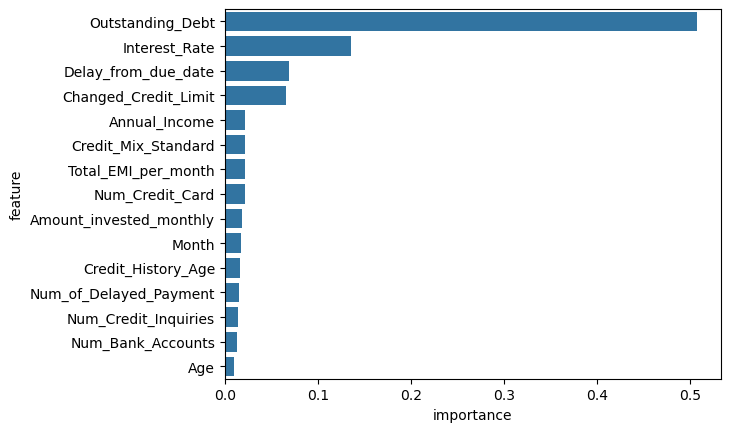

In [245]:
#Bar Chart showing the top 15 features and their importance for tuned GBM Model

sns.barplot(data = gb_tuned_imp_df.iloc[:15], x = "importance", y = "feature");

## Step 7: ROC Curve and AUC Score for each of the 5 models

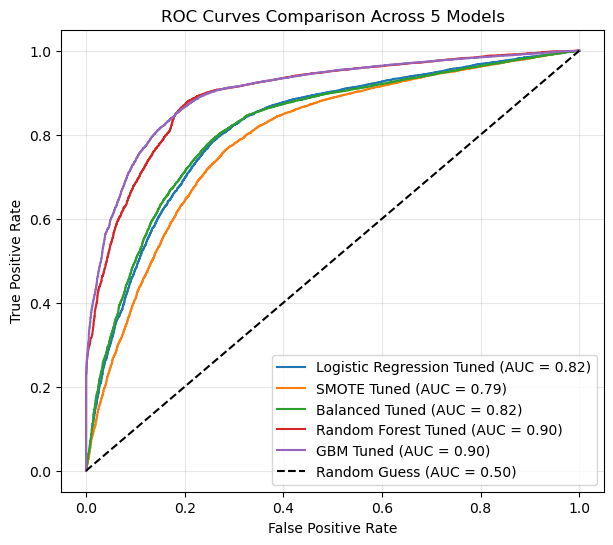

In [246]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for positive class (adjust model names as needed)
y_probs_logreg = lr.predict_proba(X_test_std)[:, 1]
y_probs_smote = lr_smote.predict_proba(X_test_std)[:, 1]
y_probs_balanced = lr_balanced.predict_proba(X_test_std)[:, 1]  
y_probs_rf_tuned = rf_tuned.predict_proba(X_test_std)[:, 1]
y_probs_gb_tuned = gb_tuned.predict_proba(X_test_std)[:, 1]

# Calculate ROC curve points and AUC for each of the 5 models
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_probs_logreg)
auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_smote, tpr_smote, _ = roc_curve(y_test, y_probs_smote)
auc_smote = auc(fpr_smote, tpr_smote)

fpr_bal, tpr_bal, _ = roc_curve(y_test, y_probs_balanced)
auc_bal = auc(fpr_bal, tpr_bal)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf_tuned)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_probs_gb_tuned)
auc_gb = auc(fpr_gb, tpr_gb)

# Plot all curves on the same axis
plt.figure(figsize=(7, 6))

plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression Tuned (AUC = {auc_logreg:.2f})')
plt.plot(fpr_smote, tpr_smote, label=f'SMOTE Tuned (AUC = {auc_smote:.2f})')
plt.plot(fpr_bal, tpr_bal, label=f'Balanced Tuned (AUC = {auc_bal:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Tuned (AUC = {auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'GBM Tuned (AUC = {auc_gb:.2f})')

# Random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Format the chart
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison Across 5 Models')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Step 8: SHAP Values and SHAP Beeswarm Plot for GBM Model

In [224]:
import shap

#Reset indices
X_test_reset = X_test.reset_index().drop(columns = "index")
y_test_reset = y_test.reset_index().drop(columns = "index")

#Pass fitted GBM model into shap's Explainer function
explainer = shap.Explainer(gb_tuned)

# Randomly sample 80 rows (keep original indices)
sample_idx = X_test_reset.sample(80, random_state=2023).index

#Pass in data to calculate SHAP values for sample
shap_values = explainer(X_test_reset.loc[sample_idx])

shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns, index = sample_idx)

y_probs_gb_tuned_series = pd.Series(y_probs_gb_tuned, index = X_test_reset.index)

shap_df["predicted_score"] = y_probs_gb_tuned_series.loc[sample_idx]
shap_df["actual_score"] = y_test_reset.loc[sample_idx]

shap_df.head()

,Month,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,predicted_score,actual_score
8648,-0.014273,-0.011669,-0.745646,0.003316,-0.057699,-0.366481,-0.353579,-0.471248,-0.178974,0.713718,...,-0.002605,-0.024438,-0.018475,-0.000632,0.000464,0.004945,0.035328,-0.167841,0.621645,0
15597,-0.137730,-0.054388,-0.465488,-0.005900,-0.241181,-0.689815,-0.202486,-0.535153,0.177060,0.010662,...,-0.063439,0.033783,-0.027296,0.007083,0.002930,0.004402,0.015695,-0.056599,0.223838,0
6810,0.096625,-0.034292,-0.996159,0.022118,-0.095874,-0.603109,-0.169559,-0.148535,-0.162863,0.866315,...,-0.031792,0.007477,-0.018468,0.001322,0.000053,0.016227,0.030888,0.061507,0.996096,1
17882,-0.068315,-0.059052,-0.728206,0.000506,-0.216702,-0.728084,-0.175490,-0.549066,-0.026764,-0.011316,...,-0.013376,0.033783,-0.018475,0.006833,0.002930,0.017517,0.050383,0.027871,0.921823,1
3789,0.048471,-0.038219,-0.916887,-0.026747,-0.081406,-0.645719,-0.120567,-0.460618,-0.269490,0.741100,...,-0.172336,-0.024438,-0.018475,-0.000632,0.000464,0.018171,0.043016,0.056594,0.956905,1


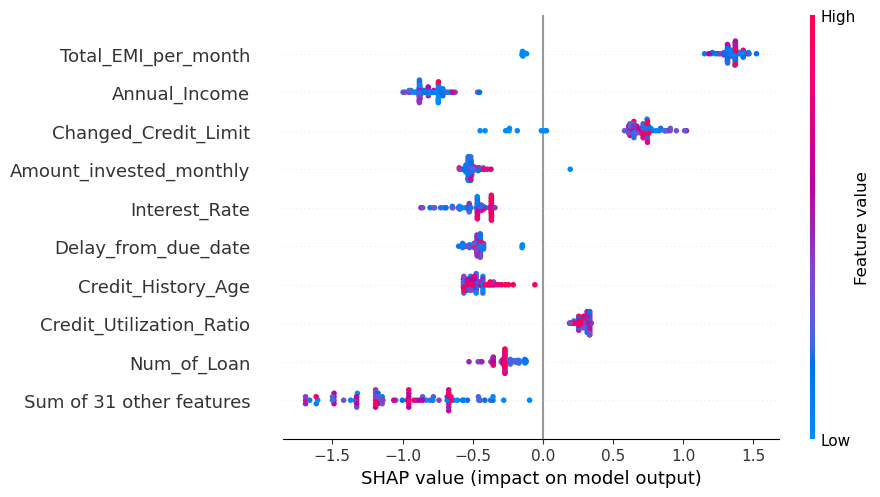

In [243]:
#Beeswarm Plot for GBM Model

shap.plots.beeswarm(shap_values)